In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Needed for Lingustic Analysis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
from wordcloud import WordCloud


# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
# Load the data
data = pd.read_csv('/content/gdrive/MyDrive/enron_spam_data 5.csv')

In [ ]:
data.dropna(subset = ["Message"], inplace=True)
# Display firt five rows
display(data.head())

# Display the summary statistics
display(data.describe())

# Print the info
print(data.info())

,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14


,Message ID
count,33345.000000
mean,16876.552587
std,9755.956715
min,1.000000
25%,8438.000000
50%,16806.000000
75%,25374.000000
max,33715.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33345 entries, 1 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33345 non-null  int64 
 1   Subject     33107 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33345 non-null  object
 4   Date        33345 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
None


spam    0.505383
ham     0.494617
Name: Spam/Ham, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


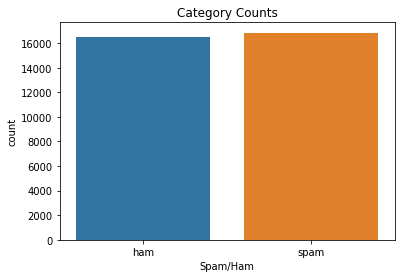

In [ ]:
# Print the counts of each category
#print(data['Spam/Ham'].value_counts())

# Print the proportions of each category
print(data['Spam/Ham'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(data['Spam/Ham'])
plt.title("Category Counts")
plt.show()

In [ ]:
# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
data['Category_enc'] = le.fit_transform(data['Spam/Ham'])

# Display the first five rows again to see the result
display(data.head())

# Print the datatypes
print(data.dtypes)

,Message ID,Subject,Message,Spam/Ham,Date,Category_enc
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,0
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,0
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,0
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,0
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14,0


Message ID       int64
Subject         object
Message         object
Spam/Ham        object
Date            object
Category_enc     int64
dtype: object


Spam/Ham
ham     356.587825
spam    258.017743
Name: word_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


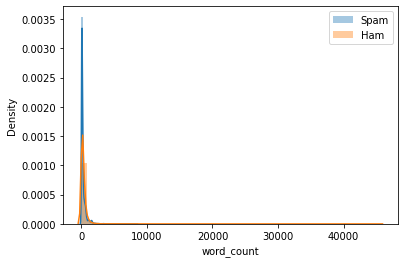

In [ ]:
# Store the number of words in each messages
data['word_count'] = data['Message'].str.split().str.len()

# Print the average number of words in each category
print(data.groupby('Spam/Ham')['word_count'].mean())

# Visualize the distribution of word counts in each category
sns.distplot(data[data['Spam/Ham']=='spam']['word_count'], label='Spam')
sns.distplot(data[data['Spam/Ham']=='ham']['word_count'], label='Ham'),
plt.legend()
plt.show()

In [ ]:
# Make the letters lower case and tokenize the words
tokenized_messages = data['Message'].str.lower().apply(word_tokenize)

# Print the tokens to see how it looks like
print(tokenized_messages)

1        [gary, ,, production, from, the, high, island,...
2          [-, calpine, daily, gas, nomination, 1, ., doc]
3        [fyi, -, see, note, below, -, already, done, ....
4        [fyi, ., -, -, -, -, -, -, -, -, -, -, -, -, -...
5        [jackie, ,, since, the, inlet, to, 3, river, p...
                               ...                        
33711    [hello, ,, welcome, to, gigapharm, onlinne, sh...
33712    [i, got, it, earlier, than, expected, and, it,...
33713    [are, you, ready, to, rock, on, ?, let, the, m...
33714    [learn, how, to, last, 5, -, 10, times, longer...
33715    [hi, :, ), do, you, need, some, softwares, ?, ...
Name: Message, Length: 33345, dtype: object


In [ ]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)

print(tokenized_messages)

1        [gary, production, from, the, high, island, la...
2                   [calpine, daily, gas, nomination, doc]
3        [fyi, see, note, below, already, done, stella,...
4        [fyi, forwarded, by, lauri, a, allen, hou, ect...
5        [jackie, since, the, inlet, to, river, plant, ...
                               ...                        
33711    [hello, welcome, to, gigapharm, onlinne, shop,...
33712    [i, got, it, earlier, than, expected, and, it,...
33713    [are, you, ready, to, rock, on, let, the, man,...
33714    [learn, how, to, last, times, longer, in, bed,...
33715    [hi, do, you, need, some, softwares, i, can, g...
Name: Message, Length: 33345, dtype: object


In [ ]:
# Define a function to remove stop words
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(remove_stop_words)

print(tokenized_messages)

1        [gary, production, high, island, larger, block...
2                   [calpine, daily, gas, nomination, doc]
3        [fyi, see, note, already, done, stella, forwar...
4        [fyi, forwarded, lauri, allen, hou, ect, pm, k...
5        [jackie, since, inlet, river, plant, shut, las...
                               ...                        
33711    [hello, welcome, gigapharm, onlinne, shop, pre...
33712    [got, earlier, expected, wrapped, cautiously, ...
33713    [ready, rock, let, man, rise, solitude, shows,...
33714    [learn, last, times, longer, bed, read, plods,...
33715    [hi, need, softwares, give, link, http, zk, ne...
Name: Message, Length: 33345, dtype: object


In [ ]:
# Define a function to lemmatization
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)

print(tokenized_messages)

1        gary production high island larger block comme...
2                         calpine daily gas nomination doc
3        fyi see note already done stella forwarded ste...
4        fyi forwarded lauri allen hou ect pm kimberly ...
5        jackie since inlet river plant shut last day f...
                               ...                        
33711    hello welcome gigapharm onlinne shop prescri l...
33712    got earlier expected wrapped cautiously impres...
33713    ready rock let man rise solitude show u societ...
33714             learn last time longer bed read plod net
33715    hi need software give link http zk net softyou...
Name: Message, Length: 33345, dtype: object


In [ ]:
# Replace the columns with tokenized messages
data['Message'] = tokenized_messages

# Display the first five rows
display(data.head(10))

,Message ID,Subject,Message,Spam/Ham,Date,Category_enc,word_count
1,1,"vastar resources , inc .",gary production high island larger block comme...,ham,1999-12-13,0,1572
2,2,calpine daily gas nomination,calpine daily gas nomination doc,ham,1999-12-14,0,8
3,3,re : issue,fyi see note already done stella forwarded ste...,ham,1999-12-14,0,344
4,4,meter 7268 nov allocation,fyi forwarded lauri allen hou ect pm kimberly ...,ham,1999-12-14,0,318
5,5,mcmullen gas for 11 / 99,jackie since inlet river plant shut last day f...,ham,1999-12-14,0,119
6,6,meter 1517 - jan 1999,george need following done jan zero receipt pa...,ham,1999-12-14,0,90
7,7,duns number changes,fyi forwarded gary l payne hou ect pm antoine ...,ham,1999-12-14,0,340
8,8,king ranch,two field gas difficulty unify system cage ran...,ham,1999-12-14,0,328
9,9,re : entex transistion,thanks much memo would like reiterate support ...,ham,1999-12-14,0,640
10,10,entex transistion,purpose email recap kickoff meeting held yeste...,ham,1999-12-14,0,329


In [ ]:
# Select the features and the target
X = data['Message']
y = data['Category_enc']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [ ]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')
#x = vectorizer.fit_transform(df['Message'].values.astype('U'))
# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(tfidf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [ ]:
prediction = classifier.predict(tfidf_test)
cr = classification_report(prediction, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3299
           1       0.99      0.99      0.99      3370

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669

